# Expand window

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Import Libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load train and test data

In [3]:
test_data = pd.read_csv("../../data/test.csv")
print(test_data.shape)
test_data.sample(5)

(109541, 13)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
95325,10259635,"12,000",3 years,Mortgage,NaN,not verified,debt_consolidation,25.73,0,4.0,24,38,Female
62762,10227072,"19,750",5 years,Rent,44000.0,VERIFIED - income,credit_card,18.76,0,NaN,8,19,Male
21593,10185903,"10,000",5 years,NaN,55000.0,VERIFIED - income source,debt_consolidation,14.12,0,49.0,14,30,Male
35622,10199932,"25,000",9 years,NaN,87000.0,VERIFIED - income,debt_consolidation,30.14,0,NaN,11,16,Female
17603,10181913,"13,375",6 years,Mortgage,150000.0,VERIFIED - income source,debt_consolidation,7.42,0,38.0,7,8,Male


In [4]:
train_data = pd.read_csv("../../data/train.csv")

print(train_data.shape)

train_data.sample(5)

(164309, 14)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
69921,10069922,"12,500",10+ years,NaN,67000.0,VERIFIED - income,debt_consolidation,20.99,1,66.0,10,42,Male,3
159374,10159375,"6,000",10+ years,Mortgage,46280.0,not verified,debt_consolidation,15.82,2,24.0,5,25,Male,2
93376,10093377,"12,000",10+ years,Mortgage,76000.0,not verified,debt_consolidation,24.22,0,NaN,11,31,Male,1
104270,10104271,"4,000",10+ years,Mortgage,NaN,not verified,debt_consolidation,22.27,2,NaN,6,27,Male,2
123938,10123939,"14,575",3 years,Rent,NaN,VERIFIED - income source,debt_consolidation,7.61,2,41.0,4,8,Male,3


# Clean data types

In [5]:
train_data.select_dtypes(exclude='object').head()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
0,10000001,68000.0,18.37,0,NaN,9,14,1
1,10000002,NaN,14.93,0,17.0,12,24,3
2,10000003,75566.4,15.88,0,NaN,12,16,3
3,10000004,56160.0,14.34,3,NaN,16,22,3
4,10000005,96000.0,22.17,1,NaN,19,30,1


In [6]:
train_data.select_dtypes(include='object').head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender
0,"7,000",< 1 year,Rent,not verified,car,Female
1,"30,000",4 years,Mortgage,VERIFIED - income,debt_consolidation,Female
2,"24,725",7 years,Mortgage,VERIFIED - income source,debt_consolidation,Male
3,"16,000",< 1 year,NaN,VERIFIED - income source,debt_consolidation,Male
4,"17,000",8 years,Own,VERIFIED - income source,debt_consolidation,Female


<b> From above we can see that 'Loan_Amount_Requested' is number but considered as an object <br /> Q: Why?</b> 

In [7]:
train_data['Loan_Amount_Requested'].sample(10)

23705     10,000
60397      2,400
110711    17,000
82622     24,000
156682    35,000
122806    22,050
1307      15,000
106242     7,500
48464      4,000
107776    10,000
Name: Loan_Amount_Requested, dtype: object

<b> Ans: We can see that it has comma separated value and is considered as string </b>

In [8]:
print("before conversion:", train_data['Loan_Amount_Requested'].dtype)

#Remove comma in string and convert to int
train_data['Loan_Amount_Requested'] = train_data['Loan_Amount_Requested'].apply(lambda val: int(val.replace(',', '')))

print("After conversion: ", train_data['Loan_Amount_Requested'].dtype)

before conversion: object
After conversion:  int64


# Check for null

In [9]:
def get_missing_info(data_frame, include_empty = False):
    missing_count = data_frame.isnull().sum()
    
    percent_missing = (missing_count/len(data_frame)) * 100  
    
    percent_missing_df = percent_missing.to_frame("Percent_Missing")
    percent_missing_df['Total_Missing'] = missing_count
    
    if include_empty:
        return percent_missing_df
    
    return percent_missing_df.loc[percent_missing_df['Percent_Missing'] > 0]

In [10]:
get_missing_info(train_data)

,Percent_Missing,Total_Missing
Length_Employed,4.486060,7371
Home_Owner,15.427639,25349
Annual_Income,15.277313,25102
Months_Since_Deliquency,53.788289,88379


## Impute missing data

### 1. Length Employed

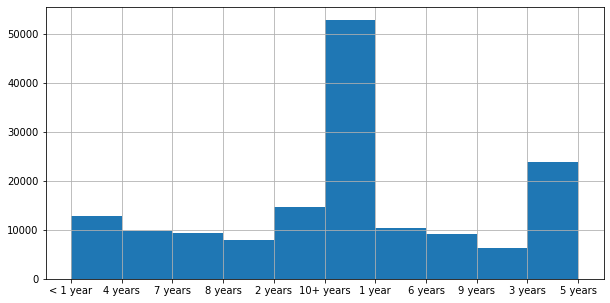

In [11]:
train_data['Length_Employed'].hist(bins=10,figsize=(10,5));

In [12]:
train_data['Length_Employed'].value_counts(dropna = False, normalize = True).to_frame('Share').apply(lambda x: x*100)

,Share
10+ years,32.204566
2 years,8.897869
3 years,7.896098
< 1 year,7.793243
5 years,6.581502
1 year,6.342927
4 years,5.954634
7 years,5.664936
6 years,5.534694
8 years,4.818361


Majority of data is skewed at 10+ years. So its better to take median value to impute 'Length_Employed'

In [13]:
train_data['Length_Employed'] = train_data['Length_Employed'].fillna('1 year')

print(train_data['Length_Employed'].isna().sum())
get_missing_info(train_data)

0


,Percent_Missing,Total_Missing
Home_Owner,15.427639,25349
Annual_Income,15.277313,25102
Months_Since_Deliquency,53.788289,88379


### 2. Home owner

In [14]:
train_data['Home_Owner'].describe()

count       138960
unique           5
top       Mortgage
freq         70345
Name: Home_Owner, dtype: object

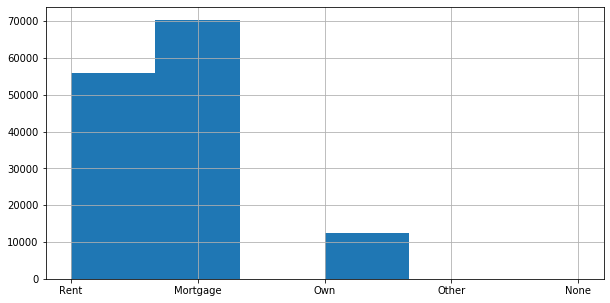

In [15]:
train_data['Home_Owner'].hist(bins = 6, figsize=(10,5));

In [16]:
train_data['Home_Owner'].value_counts(dropna = False, normalize = True).to_frame('Share').apply(lambda x: x*100)

,Share
Mortgage,42.812627
Rent,34.100993
NaN,15.427639
Own,7.622833
Other,0.029822
None,0.006086


Majority of data is skewed towards 'Mortgage'. So let's fillna with nearly centered value which is 'Rent'

In [17]:
train_data['Home_Owner'] = train_data['Home_Owner'].fillna('Rent')
print(train_data['Home_Owner'].isna().sum())
get_missing_info(train_data)

0


,Percent_Missing,Total_Missing
Annual_Income,15.277313,25102
Months_Since_Deliquency,53.788289,88379


### 3. Annual Income

In [18]:
train_data['Annual_Income'].describe()

count    1.392070e+05
mean     7.333116e+04
std      6.037750e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.869750e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

In [24]:
train_data['Annual_Income'].min(), train_data['Annual_Income'].max()

(4000.0, 7500000.0)

In [25]:
train_data['Annual_Income'].median()

63000.0

We can see that there is huge difference between 'min' and 'max'. let's fillna with median

In [27]:
train_data['Annual_Income'] = train_data['Annual_Income'].fillna(train_data['Annual_Income'].median())
print(train_data['Annual_Income'].isna().sum())
get_missing_info(train_data)

0


,Percent_Missing,Total_Missing
Months_Since_Deliquency,53.788289,88379


### 4. Months Since Deliquency

In [29]:
get_missing_info(train_data)

,Percent_Missing,Total_Missing
Months_Since_Deliquency,53.788289,88379


As we can see that more than 50% of data is missing. Let's just drop and not use this column

In [34]:
train_data = train_data.drop('Months_Since_Deliquency', axis = 1, errors='ignore')

print(train_data.shape)
train_data.head()

(164309, 13)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,30000,4 years,Mortgage,63000.0,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,16000,< 1 year,Rent,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [35]:
get_missing_info(train_data)

,Percent_Missing,Total_Missing


# Analysis

In [60]:
for i in range(1,4):
    print("Interest Rate Category:", i)
    print("-------------------------")
    print("Loan Min:", train_data.loc[train_data['Interest_Rate']==i, 'Loan_Amount_Requested'].min())
    print("Loan Max:", train_data.loc[train_data['Interest_Rate']==i, 'Loan_Amount_Requested'].max())
    print("Loan Mean:", train_data.loc[train_data['Interest_Rate']==i, 'Loan_Amount_Requested'].mean())
    
    print(" ")

Interest Rate Category: 1
-------------------------
Loan Min: 500
Loan Max: 35000
Loan Mean: 13351.44353073419
 
Interest Rate Category: 2
-------------------------
Loan Min: 500
Loan Max: 35000
Loan Mean: 13419.251912723152
 
Interest Rate Category: 3
-------------------------
Loan Min: 1000
Loan Max: 35000
Loan Mean: 16007.801678821153
 


In [68]:
purposes = list(train_data['Purpose_Of_Loan'].unique())
purposes

['car',
 'debt_consolidation',
 'credit_card',
 'home_improvement',
 'major_purchase',
 'other',
 'medical',
 'small_business',
 'moving',
 'wedding',
 'vacation',
 'house',
 'educational',
 'renewable_energy']

In [95]:
sorted_loan = train_data['Purpose_Of_Loan'].value_counts(dropna = False, normalize = True).to_frame('Share').apply(lambda x: x*100)
sorted_loan

,Share
debt_consolidation,59.096580
credit_card,22.326227
home_improvement,5.641200
other,5.079454
major_purchase,2.090573
small_business,1.455794
car,1.147229
medical,0.937867
moving,0.592786
vacation,0.509406


In [120]:
for purpose in sorted_loan.index[0:4]:
    print(purpose)
    print("================")
    print(train_data.loc[train_data['Purpose_Of_Loan'] == purpose, 'Home_Owner'].value_counts(ascending=False))
    print("")

debt_consolidation
Rent        48674
Mortgage    41526
Own          6878
Other          20
None            3
Name: Home_Owner, dtype: int64

credit_card
Rent        18519
Mortgage    15401
Own          2745
Other          14
None            5
Name: Home_Owner, dtype: int64

home_improvement
Mortgage    6153
Rent        2075
Own         1039
Other          2
Name: Home_Owner, dtype: int64

other
Rent        4769
Mortgage    2809
Own          761
Other          5
None           2
Name: Home_Owner, dtype: int64



#### From above data we can see that main purpose of loan is through 'debt consolidation' and that too for people who are staying in 'Rent' houses

In [100]:
train_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,30000,4 years,Mortgage,63000.0,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,16000,< 1 year,Rent,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [117]:
rent_debt_consolidation = train_data.loc[(train_data['Purpose_Of_Loan'] == 'debt_consolidation') & (train_data['Home_Owner'] == 'Rent')]
rent_debt_consolidation.sample(10)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
70892,10070893,9000,4 years,Rent,49000.0,not verified,debt_consolidation,11.93,1,12,18,Male,2
45543,10045544,10000,10+ years,Rent,67000.0,VERIFIED - income,debt_consolidation,18.79,1,14,42,Female,3
61281,10061282,8000,2 years,Rent,50200.0,not verified,debt_consolidation,5.82,0,8,18,Male,1
98462,10098463,4800,10+ years,Rent,43000.0,not verified,debt_consolidation,8.07,2,2,6,Male,3
19038,10019039,12000,9 years,Rent,42000.0,VERIFIED - income source,debt_consolidation,30.69,0,11,17,Female,2
158774,10158775,12300,6 years,Rent,47840.0,VERIFIED - income,debt_consolidation,12.59,1,10,17,Male,3
44177,10044178,22000,7 years,Rent,63000.0,VERIFIED - income,debt_consolidation,3.90,1,6,15,Male,2
92225,10092226,8000,1 year,Rent,80000.0,not verified,debt_consolidation,9.05,0,16,22,Male,2
67137,10067138,7000,10+ years,Rent,63000.0,VERIFIED - income,debt_consolidation,6.33,1,9,38,Male,3
14828,10014829,15000,10+ years,Rent,55000.0,not verified,debt_consolidation,16.80,0,8,17,Male,2


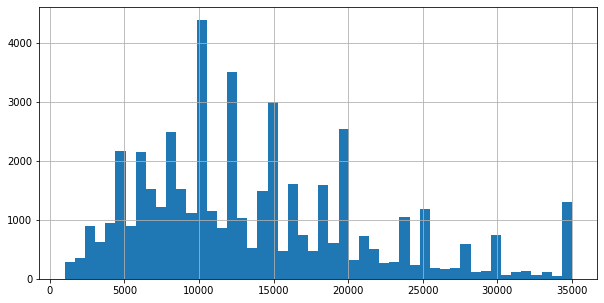

In [132]:
rent_debt_consolidation['Loan_Amount_Requested'].hist(bins=50, figsize=(10,5));